## Models 2: Decision Tree, Bagged Tree, Random Forest

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
# Import the dataset from the preprocessing stage
train_df = pd.read_csv('train_for_models.csv')
train_df.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [3]:
# Splitting the outcome and the predictor variables
target = train_df['status_group']
train_df = train_df.drop('status_group', axis=1)

In [4]:
# Create dummy variables
train_df = pd.get_dummies(train_df)
train_df.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.25, random_state=42)

In [6]:
# Build the first tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [7]:
# Feature importance
tree_clf.feature_importances_

array([5.57792583e-02, 4.20559786e-03, 1.31249286e-03, 2.85352719e-04,
       0.00000000e+00, 2.11344200e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.77708587e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.16011781e-04, 0.00000000e+00, 2.64896012e-04, 0.00000000e+00,
       0.00000000e+00, 1.59226201e-02, 1.22957513e-02, 0.00000000e+00,
       0.00000000e+00, 5.15033113e-04, 0.00000000e+00, 4.79483813e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.01908561e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.91814825e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.93824506e-04, 0.00000000e+00, 7.87723094e-03,
       1.01645890e-03, 0.00000000e+00, 1.27847914e-02, 0.00000000e+00,
       0.00000000e+00, 7.92318982e-05, 0.00000000e+00, 0.00000000e+00,
      

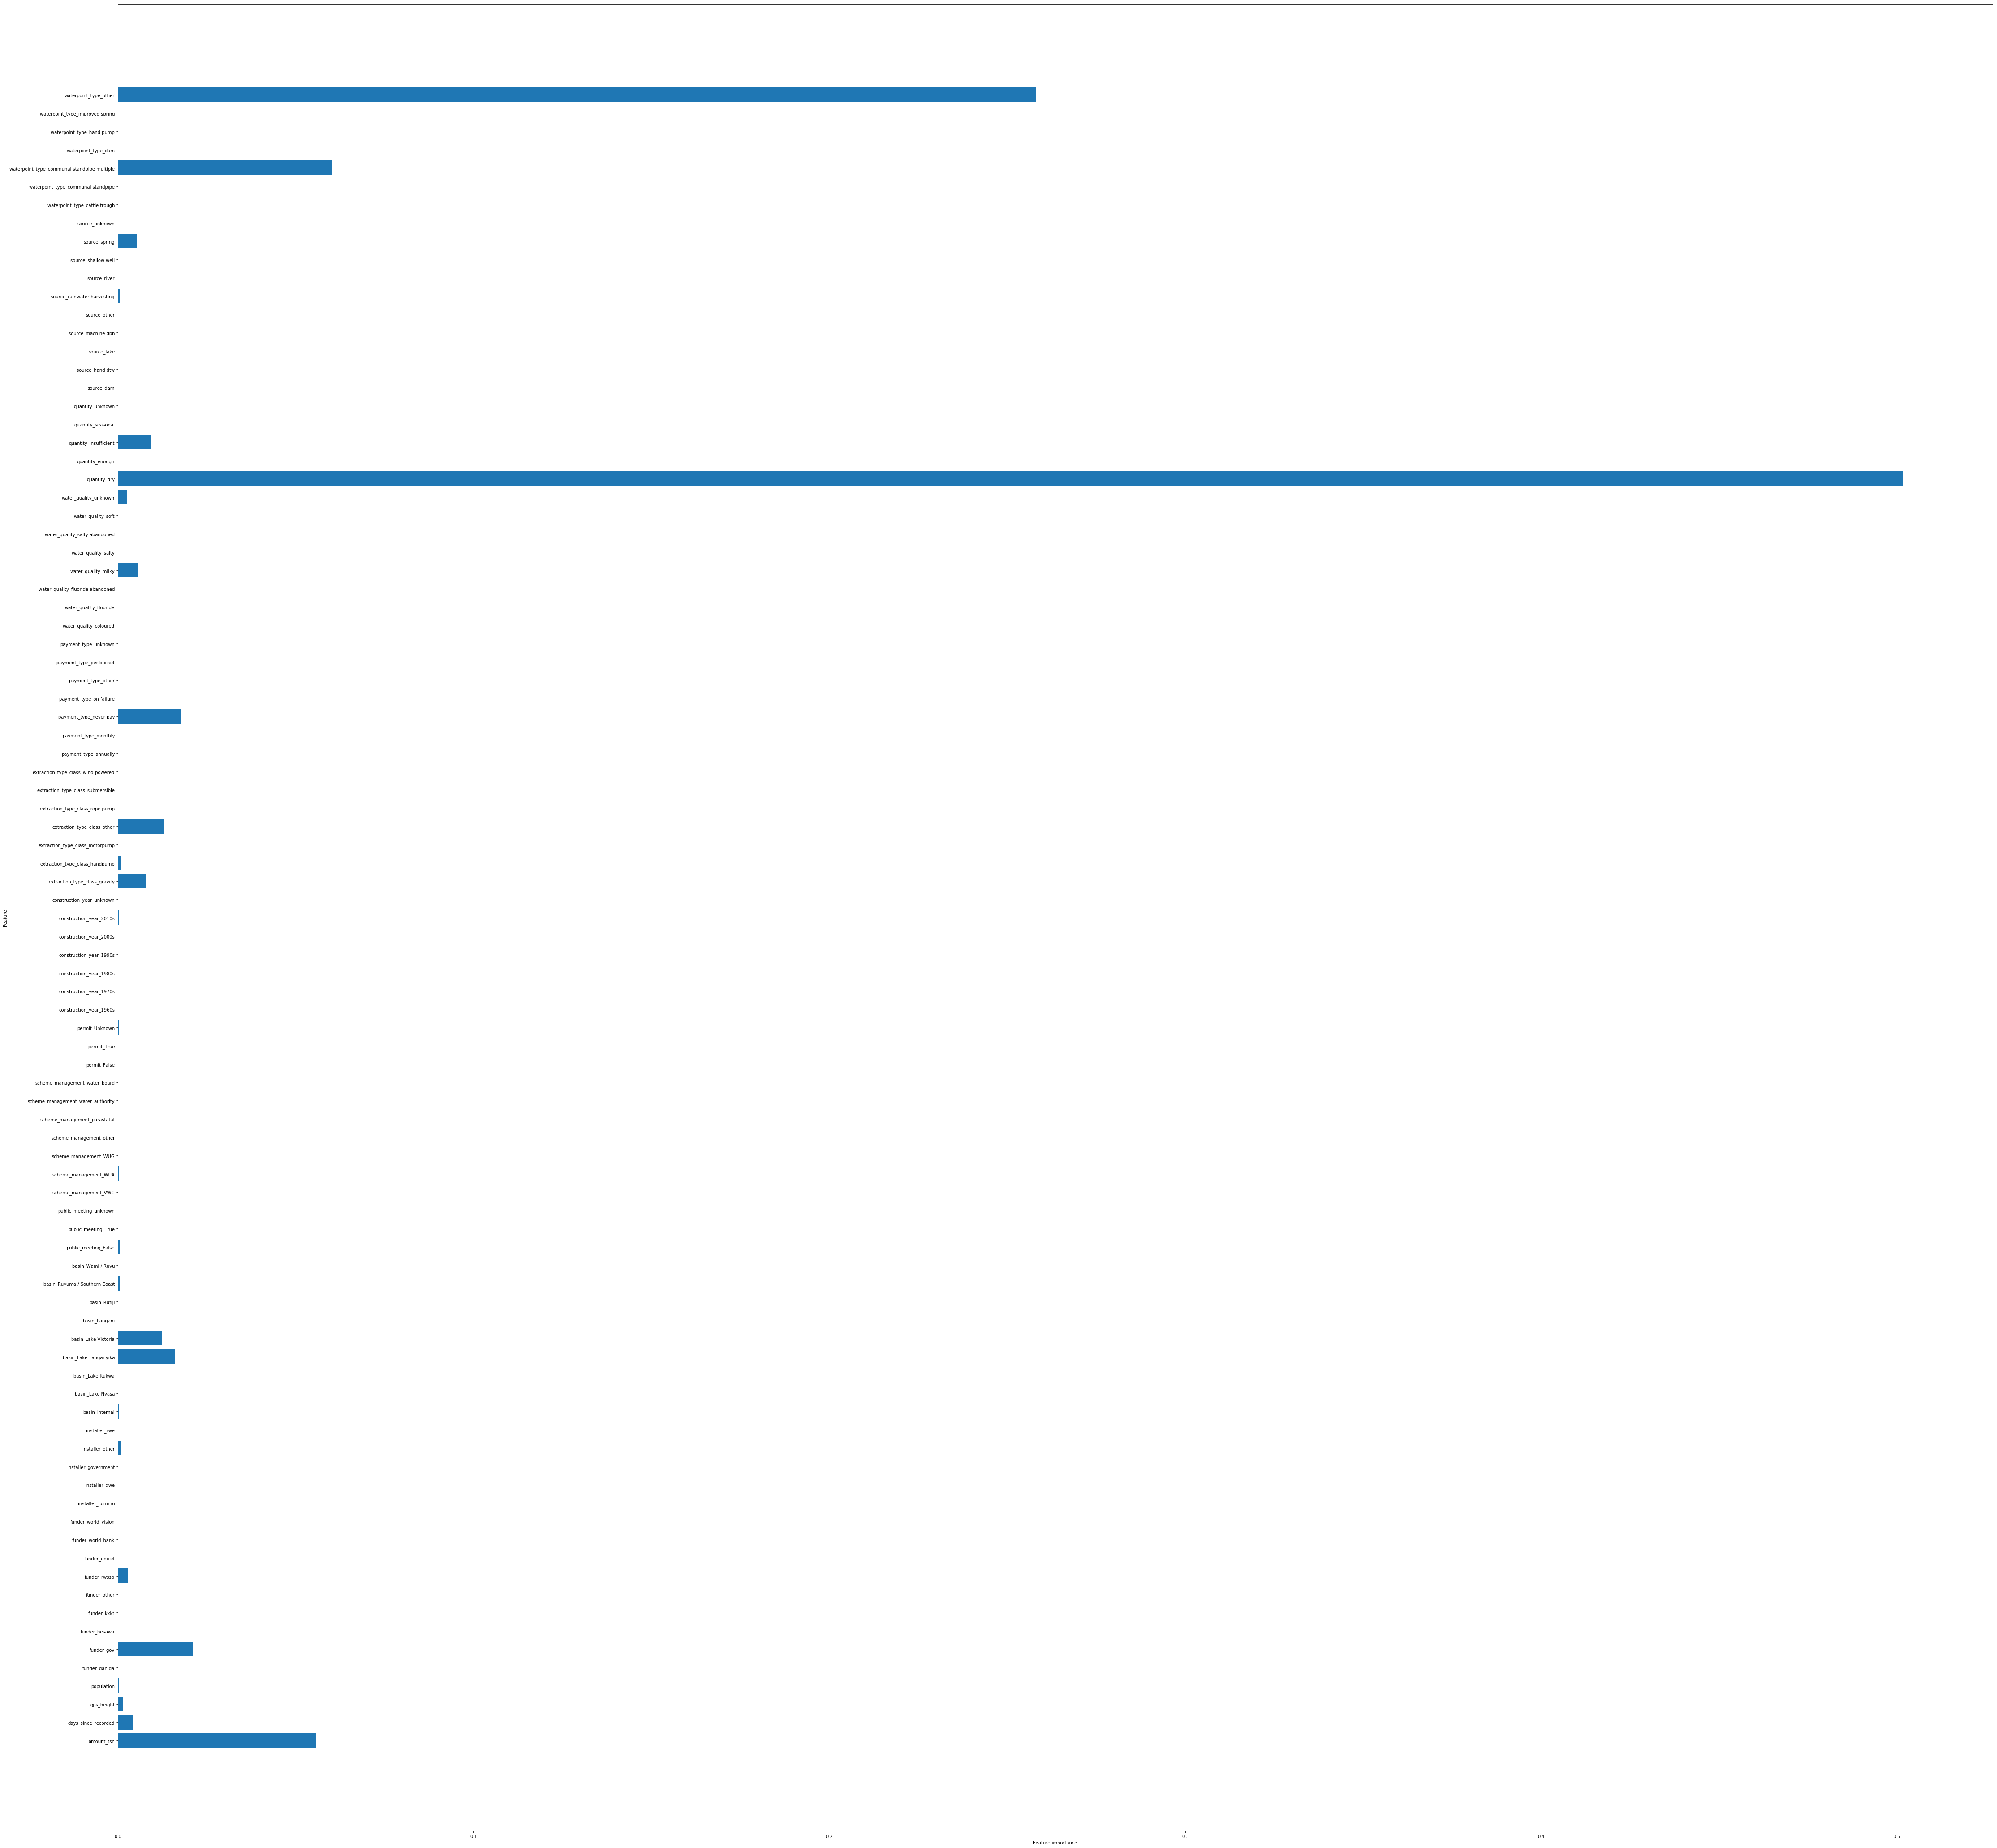

In [8]:
def plot_features_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(75,75))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_features_importances(tree_clf)

In [9]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7763   62  273]
 [ 896   89   89]
 [2982   85 2611]]
                         precision    recall  f1-score   support

             functional       0.67      0.96      0.79      8098
functional needs repair       0.38      0.08      0.14      1074
         non functional       0.88      0.46      0.60      5678

               accuracy                           0.70     14850
              macro avg       0.64      0.50      0.51     14850
           weighted avg       0.73      0.70      0.67     14850



In [10]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred)*100))

Testing Accuracy for Decision Tree Classifier: 70.46%


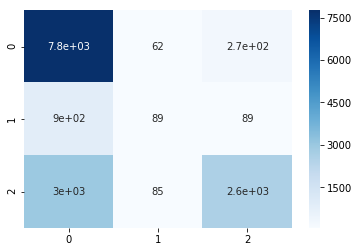

In [11]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues')

## Trying Bagged Trees

In [12]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)


In [13]:
# Fit to training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [14]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.7169472502805836

In [15]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.7123232323232324

In [16]:
bagged_tree_preds = bagged_tree.predict(X_test)
print(classification_report(y_test, bagged_tree_preds))

                         precision    recall  f1-score   support

             functional       0.68      0.94      0.79      8098
functional needs repair       0.48      0.07      0.12      1074
         non functional       0.84      0.50      0.63      5678

               accuracy                           0.71     14850
              macro avg       0.67      0.51      0.51     14850
           weighted avg       0.73      0.71      0.68     14850



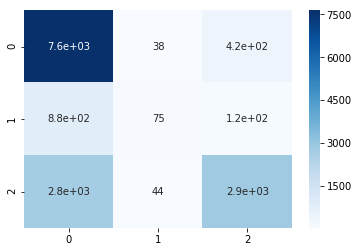

In [17]:
sns.heatmap(confusion_matrix(y_test, bagged_tree_preds), annot=True, cmap='Blues')

## Random Forests

In [18]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Training accuracy score
forest.score(X_train, y_train)

0.7228507295173962

In [20]:
# Test accuracy score
forest.score(X_test, y_test)

0.7191919191919192

In [21]:
forest_preds = forest.predict(X_test)
print(classification_report(y_test, forest_preds))

/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

             functional       0.67      0.96      0.79      8098
functional needs repair       0.00      0.00      0.00      1074
         non functional       0.88      0.51      0.64      5678

               accuracy                           0.72     14850
              macro avg       0.52      0.49      0.48     14850
           weighted avg       0.70      0.72      0.68     14850



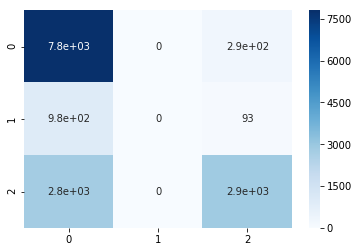

In [22]:
sns.heatmap(confusion_matrix(y_test, forest_preds), annot=True, cmap='Blues')

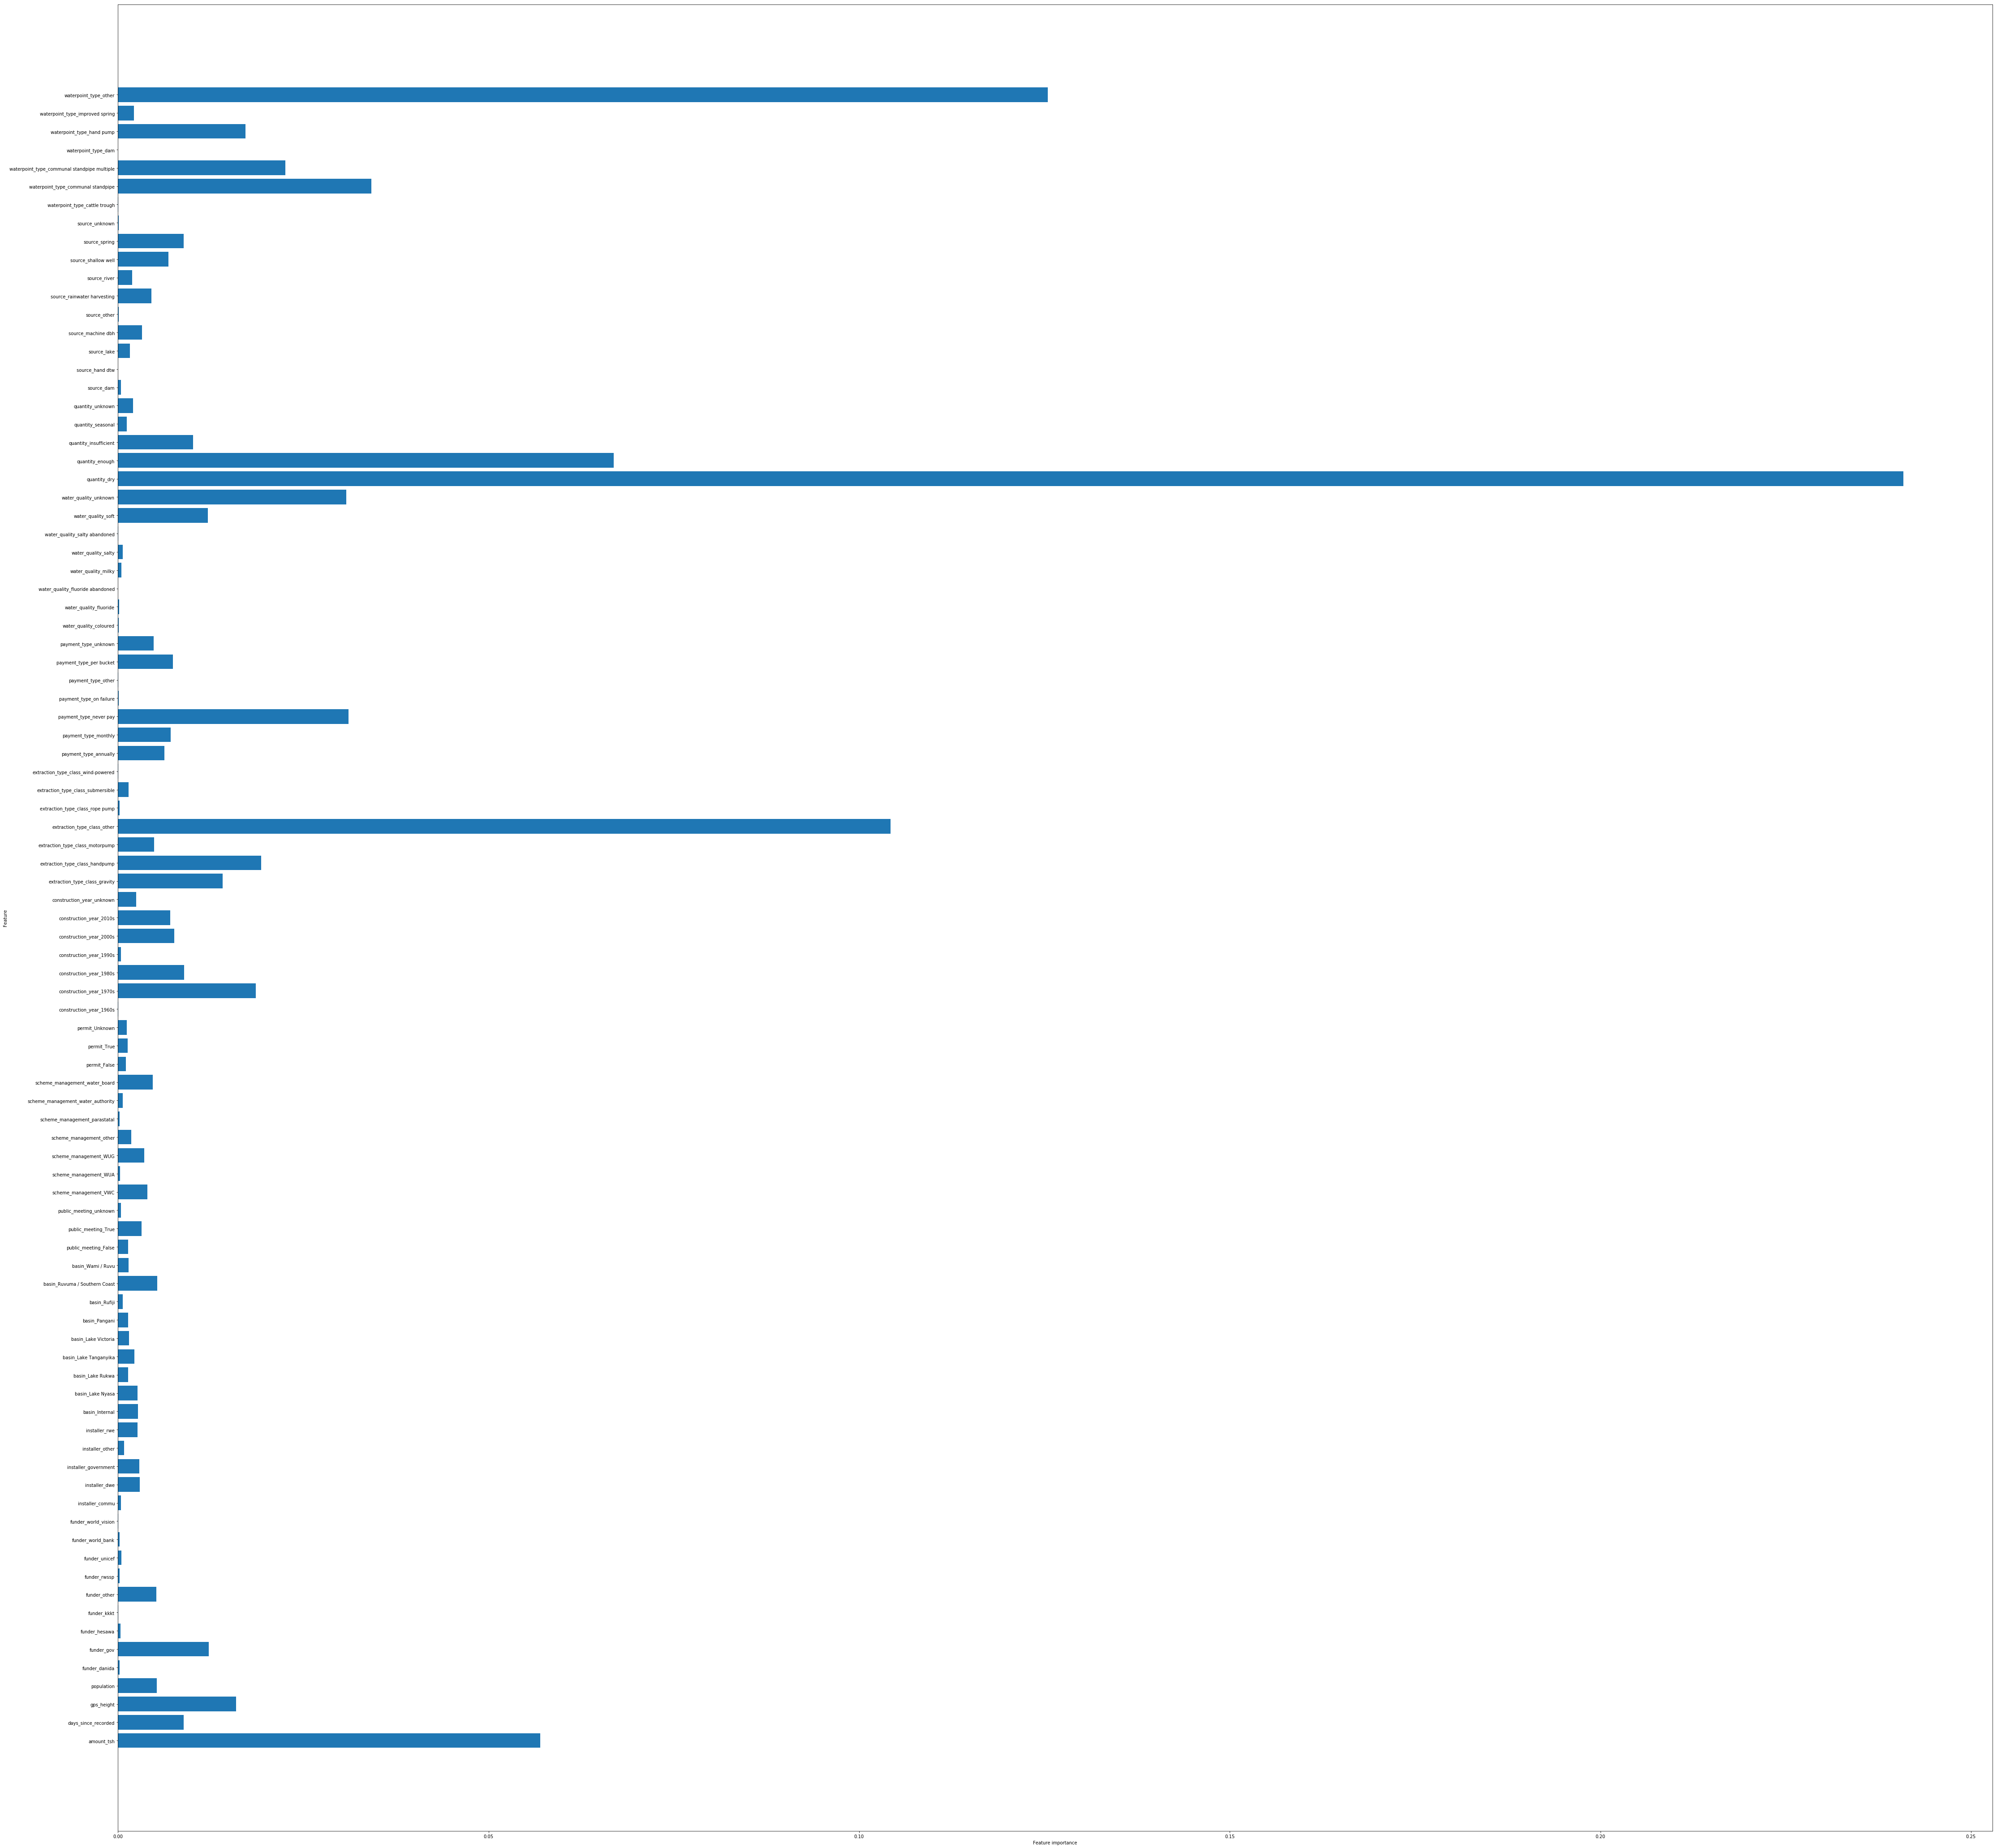

In [23]:
plot_features_importances(forest)

In [24]:
forest_2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
forest_2.score(X_train, y_train)

0.6677441077441078

In [26]:
forest_2.score(X_test, y_test)

0.6656565656565656

In [27]:
forest_2_preds = forest_2.predict(X_test)
print(classification_report(y_test, forest_2_preds))

/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

             functional       0.66      0.87      0.75      8098
functional needs repair       0.00      0.00      0.00      1074
         non functional       0.69      0.49      0.58      5678

               accuracy                           0.67     14850
              macro avg       0.45      0.46      0.44     14850
           weighted avg       0.62      0.67      0.63     14850



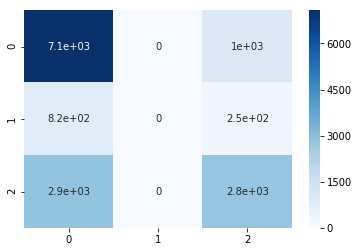

In [28]:
sns.heatmap(confusion_matrix(y_test, forest_2_preds), annot=True, cmap='Blues')

## Implementing Gridsearch 

In [29]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score: .2%}")

Mean Cross Validation Score:  74.36%


In [30]:
dt_param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 3, 4, 5, 6],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

In [31]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [32]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 73.42%
Mean Test Score: 76.42%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [33]:
forest_3 = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=6, min_samples_split=2)
mean_forest_3_cv_score = np.mean(cross_val_score(forest_3, X_train, y_train, cv=3))
print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_forest_3_cv_score :.2%}")

/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Cross Validation Score for Random Forest Classifier: 77.47%


In [34]:
rf_param_grid = {'n_estimators': [10, 30, 100],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2, 6, 10],
                 'min_samples_split': [5, 10],
                 'min_samples_leaf': [3,6]
    
}

In [35]:
rf_grid_search = GridSearchCV(forest_3, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_: .2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy:  79.07%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [36]:
best_forest=RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
best_forest.score(X_train, y_train)

0.8429629629629629

In [38]:
best_forest.score(X_test, y_test)

0.7971043771043771

In [39]:
best_forest_preds = best_forest.predict(X_test)


In [40]:
print(classification_report(y_test, best_forest_preds))

                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      8098
functional needs repair       0.66      0.22      0.33      1074
         non functional       0.86      0.72      0.78      5678

               accuracy                           0.80     14850
              macro avg       0.76      0.62      0.65     14850
           weighted avg       0.80      0.80      0.78     14850



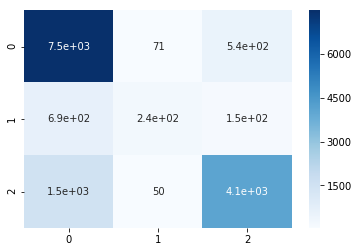

In [41]:
sns.heatmap(confusion_matrix(y_test, best_forest_preds), annot=True, cmap='Blues')